**What is Linear Regression ?**

Linear Regression is a supervised machine learning algorithm which is used to predict values within a range, such as price, based on certain number of features rather than trying to classify them into categories.

Simple linear regression uses weight(slope)-intercept form. w1 represent the slop and w2 represents the intercept. x represents our input data (features) and y (continous target variable) represents our prediction.

***y = w1x + w2***

The linear regression model will showcase this relationship by dotting an arbitarily line and computing the distance from this line to the data points. by drawing the vertical lines. This distance is the prediction’s errors.

The regression algorithm will keep moving the line through each iteration, trying to find the best-fitting line, i.e., the line with the minimum error (minimum distance).

There are several tricks to perform this task and the ultimate goal is to get the line closer to the maximum number of points. 

1.   Absolute Trick
2.   Square Trick


**Absolute Trick**

A line with slope w1 and y-intercept w2 has the following equation:

***y = w1x + w2***

We have a goal to get the line closer to a data point (p,q). To achieve this goal, the algorithm will use a parameter called “learning rate”. This learning rate is the number that will be multiplied to the function parameters in order to make small steps when approximating the line to the point. Learing rate is a small number whose sign depends on whether the point is above or below the line.

In other words, the learning rate will determine the length of the distance covered in each iteration that will get the line closer to the data point. It is commonly represented as the α symbol. 


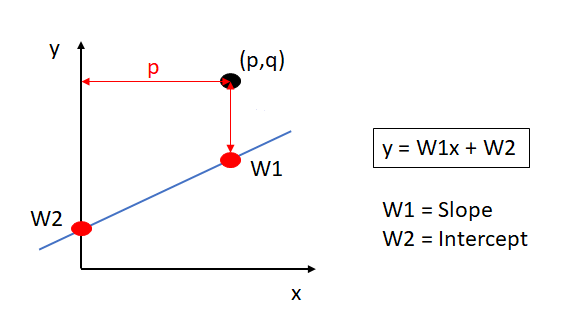


To move the line closer to the point , the application of the absolute trick involves changing the equation of the line to

***y = (w1 + pα)x + w2 + α***






**Square Trick**

In the square the trick the goal is same to move a line closed to a data point. Lets say there is a point for same y coordinate (p,q) as (p,q').The distance between (p,q) and (p,q') is given by (q-q'). Following application of the square trick, the new equation would be given by

y = (w1 + p(q-q')α)x + (w2 + (q-q')α)


where α is the learning rate and is a small number whose sign does not depend on whether the point is above or below the line. This is due to the inclusion of the (q-q') term that takes care of this implicitly.

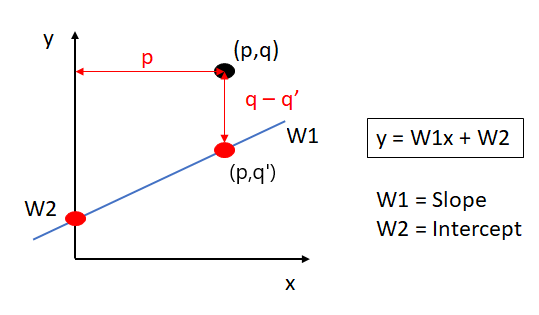




**Gradient Descent**

***How to optimize the solution or reduce the error***

Assuming that we have a set of points and we want to develop a model that will find the line that best fits this set of points. The error will be the distance from the line to the points.
The line is moved and the error is computed again. This process is repeated over and over again, reducing the error a little bit each time, until the perfect line is achieved. This perfect line will be the one with the minimum error.To minimize this error, we will use the gradient descent method.
Gradient descent is a method that, for each step, will explore all the different directions in which the line could be moved to reduce the error and will accept the model with the minimum error.

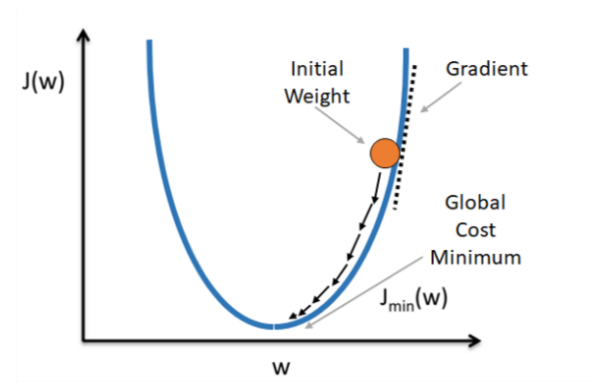



When this algorithm has taken sufficient steps, it will eventually get to a local or global minimum, if the learning rate is set to an adequate value. This is a very important detail, because, if the learning rate is too high, the algorithm will keep missing the minimum, as it will take steps too large. And if this learning rate is too low, it will take infinite time to get to the point.


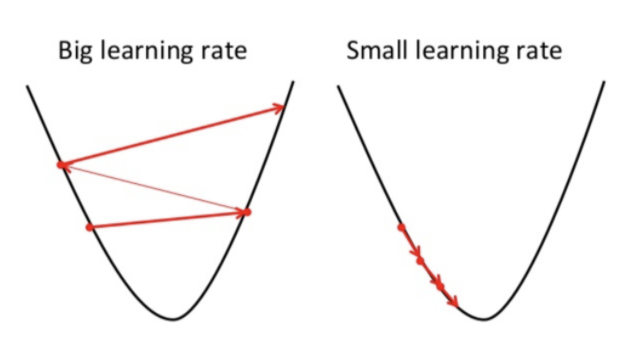
 

**Project**

In this project we are going to predict US house prices based on the number of features. House price is a continuous variable and we will predict this based on the certain number of features thus this will be categorize as a regression problem. 

Following are the feature columns:


'RM' is the average number of rooms among homes in the neighborhood.

'LSTAT' is the percentage of homeowners in the neighborhood considered “lower class” (working poor).

'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

'MEDV'  Median value of owner-occupied homes in $1000’s

**Import all required libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Read the Housing Data set**

In [ ]:
df=pd.read_csv('/content/housing.csv')

**Display the head on the data set ( first 5 records) to check out the data**

In [ ]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


**Info will display all required information with respect to data such as the number of rows, data types, null / not null data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


**Visualize the data for better understanding**


Pairplot to visualize the relationship between all the data columns


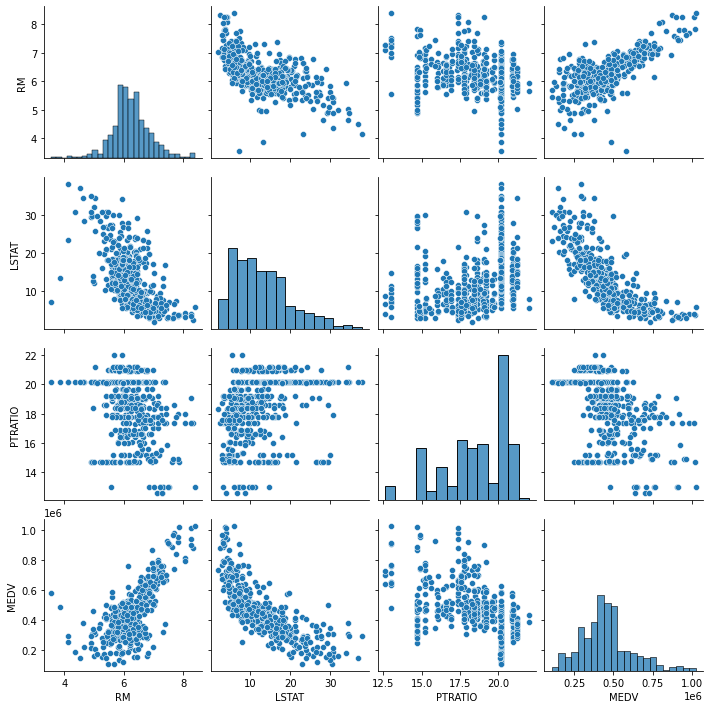

In [ ]:
sns.pairplot(df)

HeatMap visualize the data columns relationship (Co-relation) as a magnitude of color.

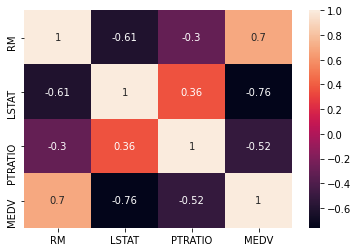

In [ ]:
sns.heatmap(df.corr(), annot=True)

Jointplot gives visualizations with multiple pairwise plots with focus on a single relationship.



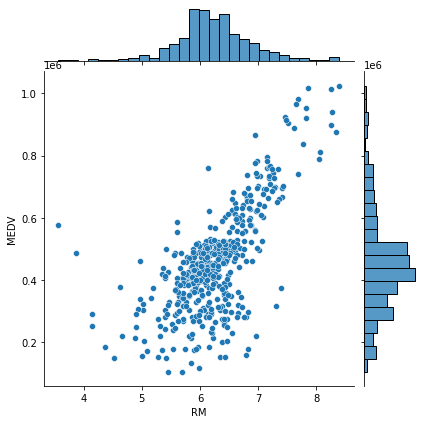

In [ ]:
sns.jointplot(x='RM',y='MEDV',data=df)

Lmplot is a 2D scatterplot with an optional overlaid regression line. This is useful for comparing numeric variables.

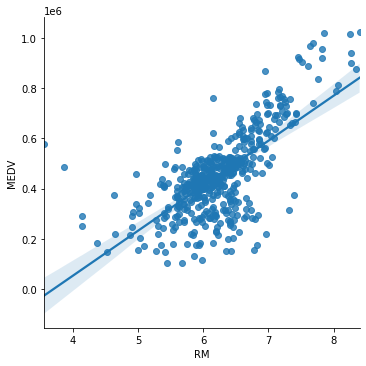

In [ ]:
sns.lmplot(x='RM', y='MEDV',data=df)

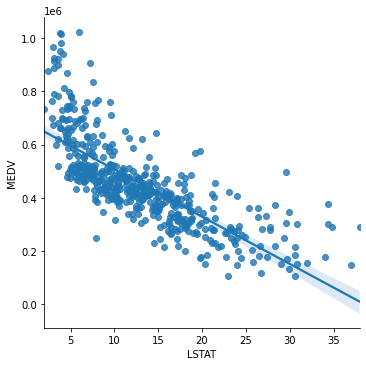

In [ ]:
sns.lmplot(x='LSTAT', y='MEDV',data=df)

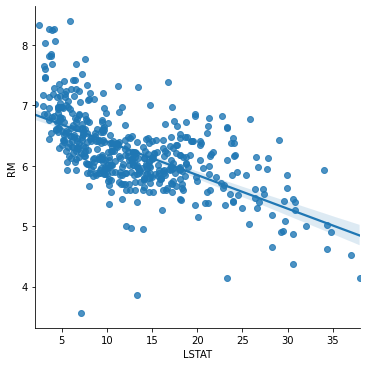

In [ ]:
sns.lmplot(x='LSTAT', y='RM',data=df)

**Perform Train Test Split of data.**


We can now evaluate a model using a train-test split.

First, the loaded dataset must be split into input and output components.

Next, we can split the dataset so that 70 % is used to train the model and 30 % is used to evaluate it. This split was chosen arbitrarily. 

Random state as 101 to ensure the splitting is same for all execution.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.



In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
x=df[['RM']]
y=df[['MEDV']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

**Train the Model**


We can then define and fit the model on the training dataset.





In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Perform the predictions**

Use the fit model to make predictions and plot the scatter plot for all the data predictions.



In [ ]:
predictions=lm.predict(x_test)

In [ ]:
lm.coef_

array([[172524.0282257]])

In [ ]:
predictions

array([[572499.48605505],
       [429132.0185995 ],
       [575432.39453489],
       [420850.86524466],
       [470192.73731721],
       [423266.20163982],
       [386346.05959952],
       [483304.56346236],
       [408946.70729709],
       [314576.06385763],
       [461911.58396238],
       [670665.65811547],
       [383240.62709146],
       [480026.60692608],
       [452250.23838174],
       [554902.03517603],
       [389278.96807936],
       [588026.64859536],
       [305604.8143899 ],
       [409981.85146644],
       [712934.04503077],
       [399802.93380113],
       [537822.15638169],
       [449834.90198658],
       [223138.32889801],
       [361330.0755068 ],
       [532301.38747846],
       [615975.54116793],
       [520397.22953089],
       [511080.9320067 ],
       [515221.50868412],
       [482786.99137769],
       [374441.90165195],
       [510218.31186557],
       [760378.15279283],
       [621668.83409937],
       [796090.62663555],
       [288352.41156733],
       [3589

Text(0, 0.5, 'Predictions')

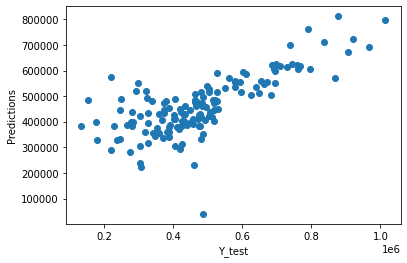

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Y_test')
plt.ylabel('Predictions')